In [ ]:

from scipy import optimize 
import seaborn as sns 
from svm_utils import *
import numpy as np

In [ ]:
N = 500
xFeatures = 2 

In [ ]:
xTrain, yTrain = generateBatchBipolar(N, sigma = 0.2)
print(xTrain.shape, yTrain.shape)

(500, 2) (500,)


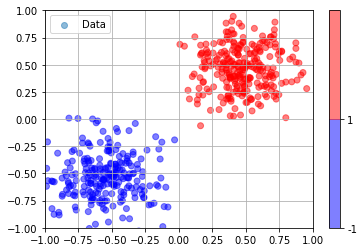

In [ ]:
plotSvm(xTrain, yTrain)

In [ ]:
from re import A
class MaxMarginClassifier:

  def __init__(self, C):
    self.C = C 

  def fit(self, X, y):

    N = len(X)

    Xy = X*y[:, np.newaxis]

    GramXy = np.matmul(Xy, Xy.T)

    def Ld0(G, alpha): 

      obj_fn = alpha.sum() - 0.5*alpha.dot(alpha.dot(G))
      return obj_fn

    def partialDerivationLd0(G, alpha):
      par_der = np.ones_like(alpha) - alpha.dot(G)
      return par_der 

    A = np.vstack((-np.eye(N), np.eye(N)))
    b = np.concatenate((np.zeros(N), self.C*np.ones(N)))

    constraints = ({'type': 'eq', 'fun': lambda a: np.dot(a,y), 'jac' : lambda a:  y}, 
                   {'type': 'ineq', 'fun': lambda a: b - np.dot(A,a), 'jac': lambda a: -A})
    
    alpha = np.ones(N)

    optRes = optimize.minimize(fun = lambda a: -Ld0(GramXy, a),
                               x0 = alpha, 
                               method = 'SLSQP',
                               jac = lambda a: -partialDerivationLd0(GramXy, a),
                               constraints = constraints)
    
    self.alpha = optRes.x

    self.w = np.sum(self.alpha[:, np.newaxis]* Xy, axis = 0)

    epsilon = 1e-4
    self.supportVectors = X[self.alpha > epsilon]
    self.supportLabels = y[self.alpha > epsilon]

    b = []
    for i in range(len(self.supportLabels)):
      b_i = self.supportLabels[i] - np.matmul(self.supportVectors[0].T, self.w)
      b.append(b_i)

    self.intercept = sum(b)/len(b)


    def predict(self, X):
      return 2*(np.matmul(X, self.w) + self.intercept > 0) - 1 



In [ ]:
model = MaxMarginClassifier(C=5)

In [ ]:
model.fit(xTrain, yTrain)

In [ ]:
model.w

array([3.01051385, 3.4216915 ])

In [ ]:
model.intercept

1.1055283623040806

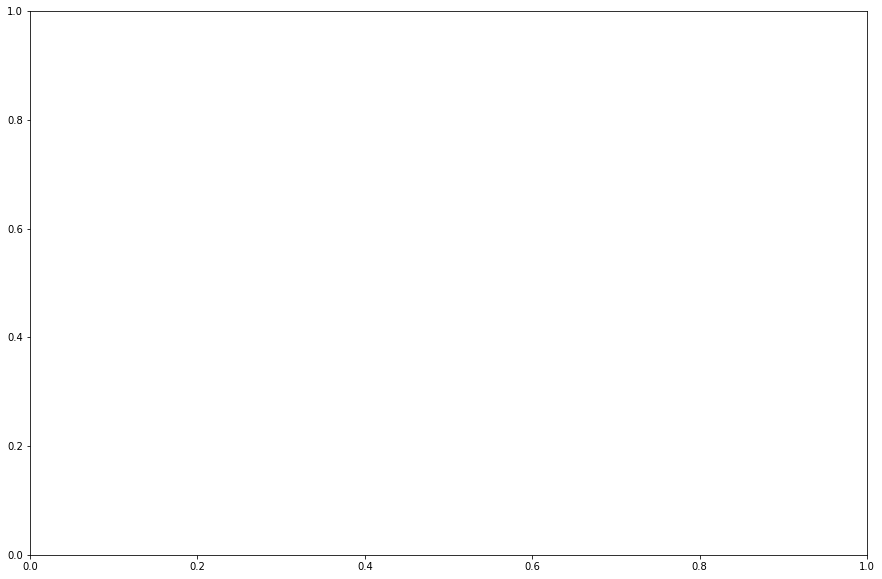

In [ ]:
fix, ax = plt.subplots(1, figsize = (15,10))
